# TIME SERIES ANALYSIS

In [33]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import sys
import datetime
from datetime import datetime as dt
import pytz

In [62]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Reading 2 Weeks data in Pandas Dataframe

In [21]:
'''
Reading files from 1st December to 10th November
'''

df_nov=pd.DataFrame({})#constructor call to create a new pandas dataframe, empty as specified.
for i in range(1,10):
    df = pd.read_csv('/content/drive/MyDrive/CDR_NOV_2/sms-call-internet-mi-2013-11-0{} copy.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_nov=df_nov.append(df)

In [24]:
'''
Reading files from 10th November to 15th November
'''
for i in range(1,6):
    df1 = pd.read_csv('/content/drive/MyDrive/CDR_NOV_2/sms-call-internet-mi-2013-11-1{} copy.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_nov=df_nov.append(df1)

In [25]:
#Converting datetime to CET
#Merging Columns smsin with smsout to get a new column sms, same is done for calls.
#df_nov['datetime'] = pd.to_datetime(df_nov.datetime, unit='ms', utc=True).dt.tz_convert('CET').dt.tz_localize(None)
df_nov['sms'] = df_nov['smsin'] + df_nov['smsout']
df_nov['calls']=df_nov['callin']+df_nov['callout']

'''
Dropping columns after merging
'''
df_nov.drop(columns=['smsin', 'smsout','callin','callout'])
#Grouping by Datetime and Square Id
df_nov = df_nov[['datetime', 'squareid', 'internet', 'sms', 'calls']].groupby(['datetime', 'squareid'], as_index=False).sum()
'''
Filling Na/Nan values with 0 for analyzing purposes
'''
df_nov.fillna(0)


,datetime,squareid,internet,sms,calls
0,2013-10-31 23:00:00,1,11.028366,0.298651,0.213213
1,2013-10-31 23:00:00,2,11.058225,0.286884,0.219658
2,2013-10-31 23:00:00,3,11.090008,0.274357,0.226519
3,2013-10-31 23:00:00,4,10.941881,0.332737,0.194543
4,2013-10-31 23:00:00,5,9.916548,0.308428,0.182593
...,...,...,...,...,...
20159675,2013-11-15 22:50:00,9996,40.391616,2.884470,0.544080
20159676,2013-11-15 22:50:00,9997,41.979429,3.270323,0.619667
20159677,2013-11-15 22:50:00,9998,41.370674,3.202326,0.606067
20159678,2013-11-15 22:50:00,9999,29.126174,1.964734,0.441224


In [26]:
df_nov.head(5)

,datetime,squareid,internet,sms,calls
0,2013-10-31 23:00:00,1,11.028366,0.298651,0.213213
1,2013-10-31 23:00:00,2,11.058225,0.286884,0.219658
2,2013-10-31 23:00:00,3,11.090008,0.274357,0.226519
3,2013-10-31 23:00:00,4,10.941881,0.332737,0.194543
4,2013-10-31 23:00:00,5,9.916548,0.308428,0.182593


In [27]:
df_nov.tail(5)

,datetime,squareid,internet,sms,calls
20159675,2013-11-15 22:50:00,9996,40.391616,2.884470,0.544080
20159676,2013-11-15 22:50:00,9997,41.979429,3.270323,0.619667
20159677,2013-11-15 22:50:00,9998,41.370674,3.202326,0.606067
20159678,2013-11-15 22:50:00,9999,29.126174,1.964734,0.441224
20159679,2013-11-15 22:50:00,10000,27.043819,1.472299,0.493472


# Time Series Graph for populated locations in Milan

In [28]:
#Extracting number of hours from each datetime field and putting them in a new column
#We subtract by 1 to account for the day which starts at hour 0.
df_nov['hour'] =df_nov.datetime.dt.hour+24*(df_nov.datetime.dt.day-1)
#setting the index by hour
df_nov = df_nov.set_index(['hour']).sort_index()

In [61]:
df_nov.head(5)

,datetime,squareid,internet,sms,calls
hour,,,,,
0,2013-11-01 00:50:00,9998,21.720817,1.224833,0.000000
0,2013-11-01 00:20:00,3,6.847863,0.417623,0.139208
0,2013-11-01 00:20:00,2,6.840418,0.409840,0.136613
0,2013-11-01 00:20:00,1,6.833425,0.402529,0.134176
0,2013-11-01 00:10:00,10000,11.958522,0.277082,0.000000


In [31]:
import seaborn as sns
from IPython.display import set_matplotlib_formats


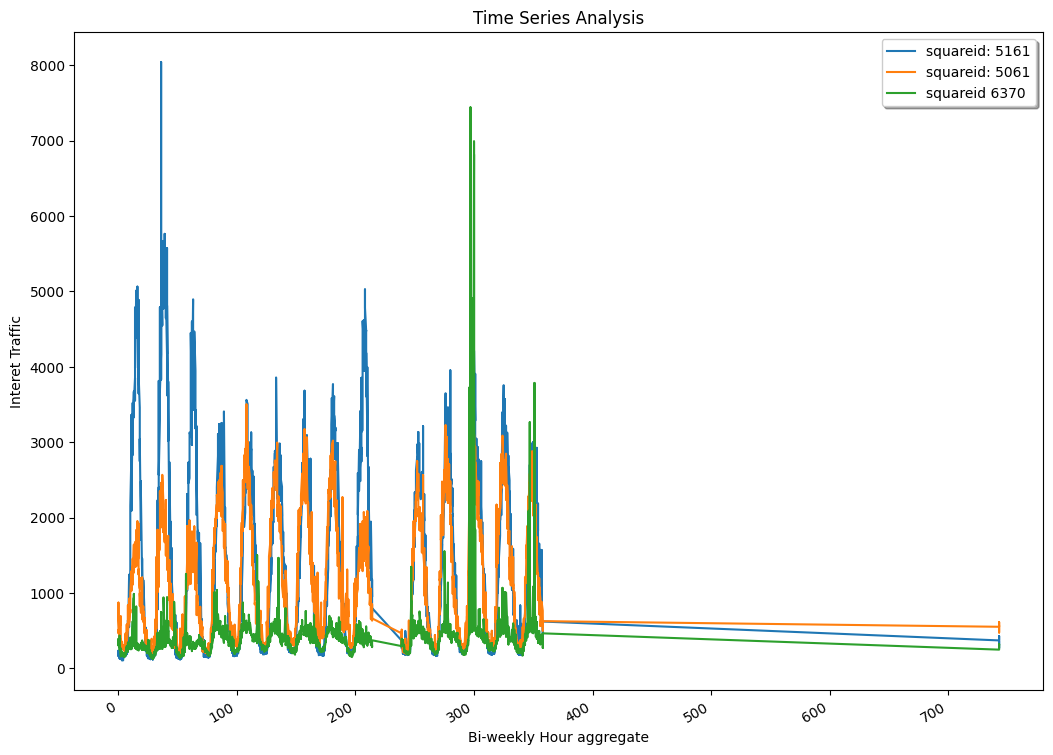

In [81]:
#Plotting a graph

ax = df_nov[df_nov.squareid==5161]['internet'].plot(label='squareid: 5161')
bx = df_nov[df_nov.squareid==5061]['internet'].plot(label='squareid: 5061')
cx = df_nov[df_nov.squareid==6370]['internet'].plot(label='squareid 6370')


ax.legend(loc='upper right',fancybox=True, shadow=True)
bx.legend(loc='upper right',fancybox=True, shadow=True)
cx.legend(loc='upper right',fancybox=True, shadow=True)



box = ax.get_position()
plt.title('Time Series Analysis')
plt.xticks(rotation=30, ha='right')

ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

plt.xlabel('Bi-weekly Hour aggregate')
plt.ylabel('Interet Traffic')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 9.5, forward=True)



In [65]:
pip install geojson

In [67]:
pip install descartes

# Heatmap


In [68]:
import geojson
import matplotlib.colors as colors
import matplotlib.cm as cmx
from descartes import PolygonPatch

#Initializing some variables for looping
num = int(10000+1)
arr_squareid = np.zeros(num)
arr_mean = np.zeros(num)

for i in range(1,num): #For each square id extracting the cell activity and calculating the mean.
    ydata = df_nov[df_nov.squareid==i]['internet']
    xdata = df_nov[df_nov.squareid==i]['internet'].index
    mean = np.mean(ydata)
    arr_squareid[i]=i
    arr_mean[i]=mean

arr_mean[arr_mean<=0] = 1 #replacing 0's with 1's for log calc
arr_mean_log = np.log(arr_mean)

with open("/content/drive/MyDrive/milano-grid.geojson") as json_file:
    json_data = geojson.load(json_file)

print(json_data.keys())

dict_keys(['type', 'crs', 'features'])


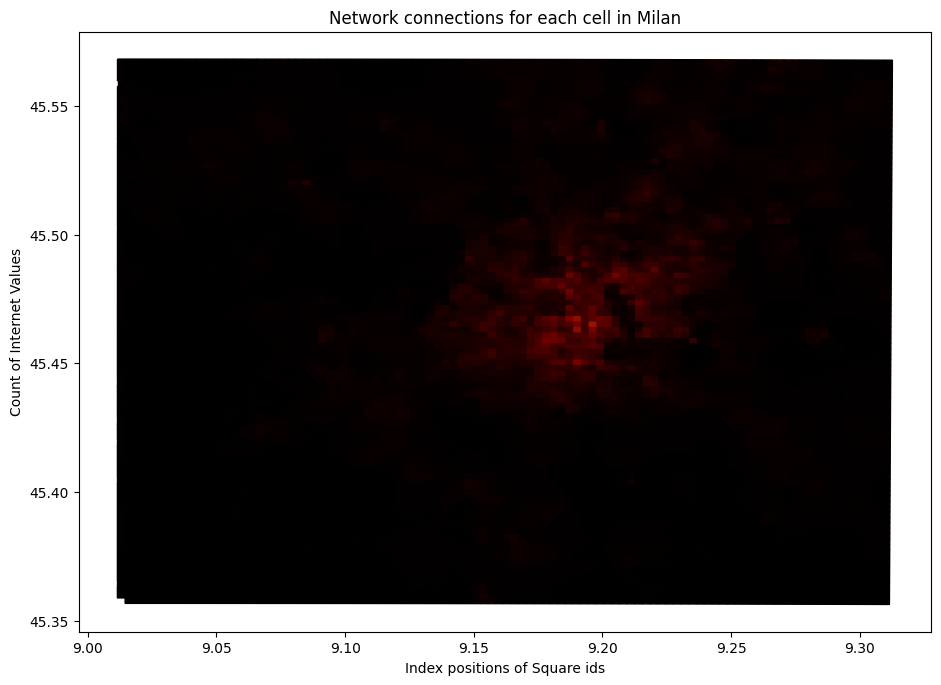

In [82]:
fig = plt.figure()
ax = fig.gca()

coordlist = json_data.features[1]['geometry']['coordinates'][0]
# 1 and 0 extracts the list of latitudes and longitudes of Milan

jet = cm = plt.get_cmap('afmhot')

#
cNorm  = colors.Normalize(vmin=0, vmax=5000)

#Mapping data values to colors based on normalize function.
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)


for i in range(1,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(arr_mean[i])
    #adding  a (a filled polygon) to the Axes  fill color, edge color (ec), opacity (alpha), and z-order.
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=1, zorder=1 ))
    #To maintain proportionality in the code.
    ax.axis('scaled')

fig.set_size_inches(11,11)
plt.title("Network connections for each cell in Milan")
plt.xlabel('Index positions of Square ids')
plt.ylabel('Count of Internet Values')
plt.show()

# References


1.   https://pandas.pydata.org/docs/user_guide/index.html
2.   https://www.geeksforgeeks.org/pandas-tutorial/#visualization
3.   https://github.com/Aujasvi-Moudgil/Forecasting-Mobile-Network-Traffic

